# 합성곱 신경망을 사용한 이미지 분류

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)


In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

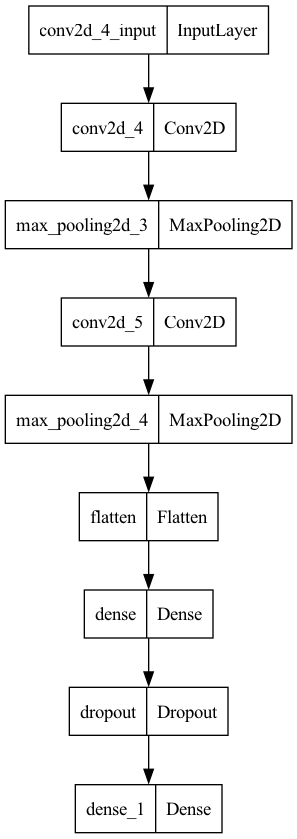

In [8]:
#그림으로 나타내기
keras.utils.plot_model(model)

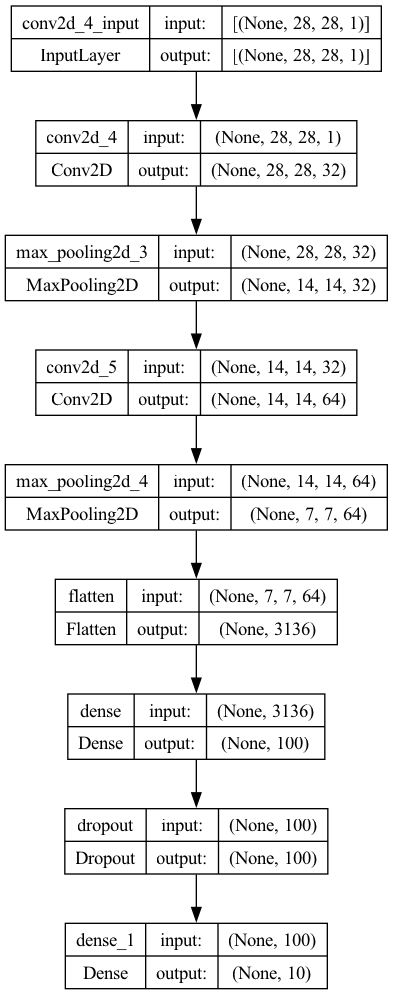

In [9]:
keras.utils.plot_model(model, show_shapes=True)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose = 2, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1500/1500 - 25s - loss: 0.2537 - accuracy: 0.9087 - val_loss: 0.2485 - val_accuracy: 0.9092 - 25s/epoch - 16ms/step
Epoch 2/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 - 21s - loss: 0.2273 - accuracy: 0.9166 - val_loss: 0.2356 - val_accuracy: 0.9132 - 21s/epoch - 14ms/step
Epoch 3/20
1500/1500 - 19s - loss: 0.2184 - accuracy: 0.9200 - val_loss: 0.2190 - val_accuracy: 0.9209 - 19s/epoch - 13ms/step
Epoch 4/20
1500/1500 - 19s - loss: 0.1976 - accuracy: 0.9261 - val_loss: 0.2351 - val_accuracy: 0.9193 - 19s/epoch - 13ms/step
Epoch 5/20
1500/1500 - 21s - loss: 0.1879 - accuracy: 0.9312 - val_loss: 0.2310 - val_accuracy: 0.9161 - 21s/epoch - 14ms/step


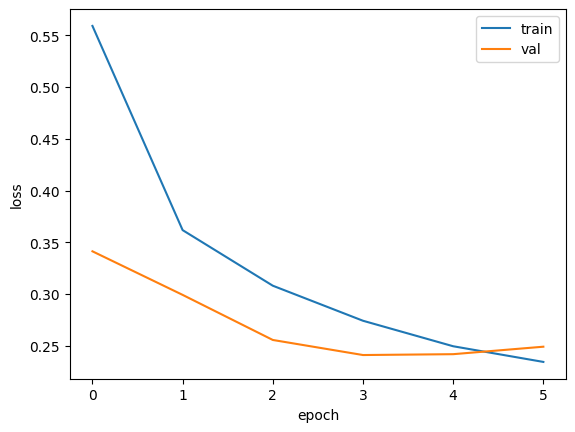

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2190 - accuracy: 0.9209


[0.21903479099273682, 0.9209166765213013]

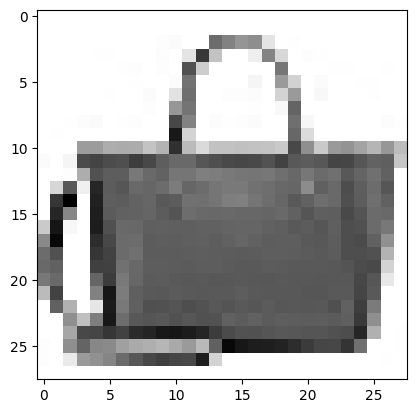

In [16]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [15]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 70ms/step
[[1.7670164e-18 1.5109756e-27 7.4452540e-21 7.5895616e-18 1.3693043e-18
  6.9125558e-20 3.3118289e-18 1.1184771e-17 1.0000000e+00 1.3746531e-18]]


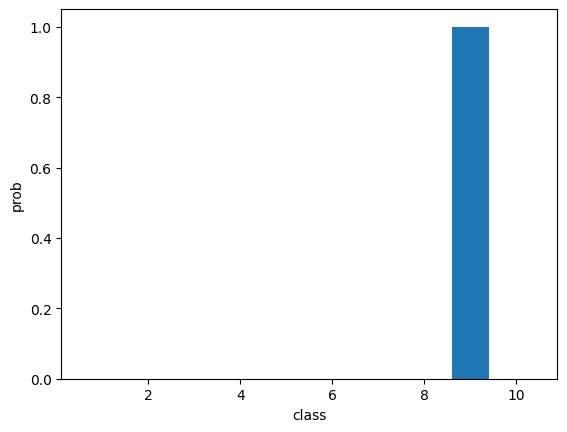

In [17]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()


In [18]:
import numpy as np
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
print(classes[np.argmax(preds)])

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

가방
313/313 [==============================] - 1s 4ms/step - loss: 0.2394 - accuracy: 0.9151


[0.23935651779174805, 0.9150999784469604]